In [16]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.models import Sequential
from keras.datasets import mnist
from keras import backend as K
import matplotlib.pyplot as plt


In [9]:
(X_train,y_train), (X_test,y_Test)=mnist.load_data()
batch_size=128
num_classes=10
epochs=12
img_rows=28
img_col=28
input_shape=(28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')





11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [13]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_Test=keras.utils.to_categorical(y_Test,num_classes)

In [14]:
print(f"Y train :{len(y_train)}")
print(f"Y test : {len(y_Test)}")

Y train :60000
Y test : 10000


In [15]:
# deep learning model

In [21]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [28]:
model.compile(optimizer=keras.optimizers.Adadelta(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])


Epoch 1/12
469/469 [==============================] - 50s 105ms/step - loss: 2.2949 - accuracy: 0.1312 - val_loss: 2.2511 - val_accuracy: 0.2210
Epoch 2/12
469/469 [==============================] - 31s 67ms/step - loss: 2.2473 - accuracy: 0.1860 - val_loss: 2.1988 - val_accuracy: 0.3464
Epoch 3/12
469/469 [==============================] - 31s 67ms/step - loss: 2.2003 - accuracy: 0.2430 - val_loss: 2.1446 - val_accuracy: 0.4935
Epoch 4/12
469/469 [==============================] - 31s 67ms/step - loss: 2.1511 - accuracy: 0.3025 - val_loss: 2.0867 - val_accuracy: 0.5909
Epoch 5/12
469/469 [==============================] - 32s 67ms/step - loss: 2.0987 - accuracy: 0.3585 - val_loss: 2.0241 - val_accuracy: 0.6624
Epoch 6/12
469/469 [==============================] - 32s 67ms/step - loss: 2.0412 - accuracy: 0.4094 - val_loss: 1.9564 - val_accuracy: 0.7085
Epoch 7/12
469/469 [==============================] - 31s 67ms/step - loss: 1.9828 - accuracy: 0.4515 - val_loss: 1.8849 - val_accuracy

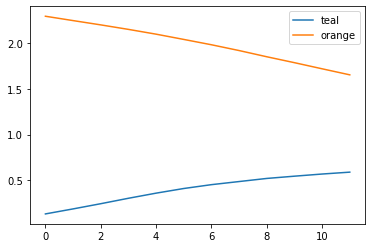

In [29]:
results=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_Test))


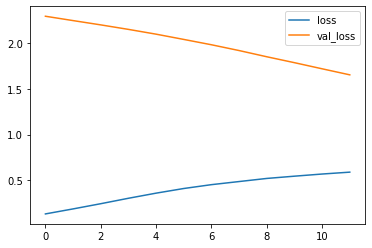

In [31]:
plt.plot(results.history['accuracy'] ,label='loss')
plt.plot(results.history['loss'],label='val_loss')
plt.legend()
plt.show()

In [32]:
print(model.evaluate(X_test,y_Test))

313/313 [==============================] - 4s 13ms/step - loss: 1.5081 - accuracy: 0.7929
[1.5080573558807373, 0.792900025844574]
